# Introduction to Multiple Linear Regression

We know that the equation of a straight line is basically: y = mx + b, Where b is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept and slope. There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

This same concept can be extended to the cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of house based upon its area, number of bedrooms, average income of the people in the area, the age of the house, and so on. In this case the dependent variable is dependent upon several independent variables. A regression model involving multiple variables can be represented as:

y = b0 + m1b1 + m2b2 + m3b3 + ... ... mnbn

This is the equation of a hyper plane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyper plane.

Let’s try to implement this in Python. We will be using a student score dataset. In this particular dataset, we have math, reading and writing exam scores of 1000 students. We will try to predict the score of writing exam from math and reading scores.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
scores = pd.read_csv('C:/Users/ajana/Downloads/student_math_scores.csv')
print('First few rows of dataset:\n',scores.head())
print('\nStatistics of dataset variables:\n',scores.describe())

First few rows of dataset:
    Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Statistics of dataset variables:
               Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000    79.000000
max     100.000000   100.000000   100.000000


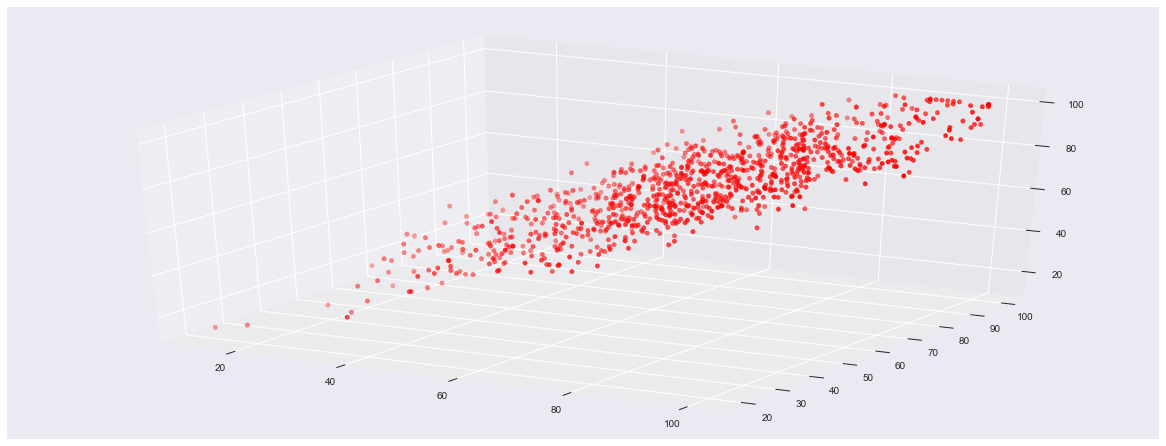

In [3]:
math = scores['Math'].values
read = scores['Reading'].values
write = scores['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='red')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
regressor = LinearRegression()
# Data Fitting
regressor = regressor.fit(X, Y)
# Y Prediction
Y_pred = regressor.predict(X)

In [5]:
from sklearn import metrics

print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

print('MAE         : ', metrics.mean_absolute_error(Y_pred, Y))
print('MSE         : ', metrics.mean_squared_error(Y_pred, Y))
print('RMSE        : ', np.sqrt(metrics.mean_squared_error(Y_pred, Y)))
print('Target Mean : ', np.mean(Y))

Model slope:     [ 0.09600221  0.91049989]
Model intercept: -1.46243738494
MAE         :  3.64445220888
MSE         :  20.9112959889
RMSE        :  4.57288705184
Target Mean :  68.616


We can say that in this model,

y-writing = (−0.47889172) + (0.09137252)∗x-math + (0.90144884)∗x-reading

Mean of writing is 68 and RMSE is 4.57 which is 7% of mean of writing. So, our error is very minimal.

Let's take another example to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license. The details of the dataset can be found in this link: http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt

Now let's develop a multiple regression model for this task.

In [6]:
dataset = pd.read_csv('https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/petrol_consumption.csv')  
print('First few rows of dataset:\n', dataset.head())
print('\nStatistics of dataset variables:\n', dataset.describe())

First few rows of dataset:
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Statistics of dataset variables:
        Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   


The next step is to prepare the dataset for the linear regressor model. Let's divide the data into attributes and labels. However, unlike last time, this time around we are going to use column names for creating an attribute set and label. Then divide our data into training and test sets.

In [7]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']  

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

Let's build & train the linear regressor model with mutliple features and label.

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petrol_tax", there is a decrease of 40.016 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.341 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption. Now, let's run the predictions on test dataset

In [9]:
y_pred = regressor.predict(X_test)  

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE. Also,  compare the RMSE with mean of target variable

In [10]:
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Petrol Consumption Mean  : ', np.mean(y_test))

Mean Absolute Error      :  56.822247479
Mean Squared Error       :  4666.34478759
Root Mean Squared Error  :  68.3106491522
Petrol Consumption Mean  :  549.4


You can see that the value of RMSE is 68.31, which is slightly greater than 12% of the mean value of the gas consumption in all states. This means that our algorithm can be tuned to perform better but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

We have seen above that Average Income and PAved Highways dont have much correlation with the Petrol Consumption. Let's confirm this theory with correlation matrix.

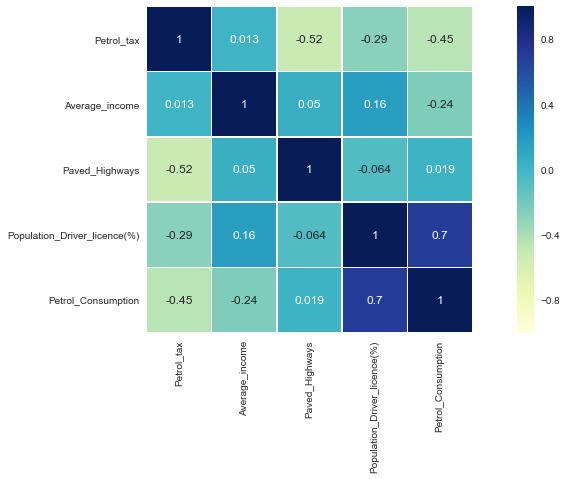

In [11]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
sns.heatmap(data=corr, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu");

We can observe the same conclusion from correlation matrix also. Let's remove Average Income and Paved Higways from features set and then predict the values again and check if the model is performing better or no.

In [12]:
X = dataset[['Petrol_tax', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

y_pred = regressor.predict(X_test)  

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Petrol Consumption Mean  : ', np.mean(y_test))

Mean Absolute Error      :  67.3289686717
Mean Squared Error       :  5628.60339417
Root Mean Squared Error  :  75.0240187818
Petrol Consumption Mean  :  549.4


We see that even if Average Income and Paved Highways are not have much correlation still it contributes to better model than the one train without these features.

Download and play with some other regression datasets to see what kind of results you can get out of those. The more experience the better!
https://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table